# Distribution Estimation

###### Here, the results of the different types of distributions used are analyzed and compared.

##### Considered Distributions:


###### <ul> - [Weibull Minimun Extreme Value](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html)
###### <ul> - [Gamma](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html)
###### <ul> - [Lognormal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html)
###### <ul> - [Exponential](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html)
###### <ul> - [Normal](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)
---

#### Loading Packages and Database
----

In [1]:
import plotly.io as pio
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# import fast_dummies
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
from scipy.stats import triang, gaussian_kde
from scipy.stats import weibull_min, lognorm, norm, expon, gamma
import os
import sys
from pathlib import Path

In [2]:
# Adicionar o diretório 'modules_py' ao sys.path
modules_path = Path("modules_py").resolve()
sys.path.append(str(modules_path))

from data_cleaning import DataCleaning_MyData, DataCleaning_GroupData, DataCleaning_OffCod, DataCleaning_frequents, DataCleaning_dummies
from estimaDistribuicao import estima_distribuicao

try:
    # Executar a função principal de limpeza de dados
    my_data = DataCleaning_MyData()
    clean_media = DataCleaning_GroupData()
    OffCod_Agru = DataCleaning_OffCod()
    mais_frequentes = DataCleaning_frequents()
    dummies = DataCleaning_dummies()
    
    print("Dados processados com sucesso!")
    display(mais_frequentes)
    

# Mostrar o erro caso não execute
except Exception as e:
    print(f"Ocorreu um erro: {e}")




Dados processados com sucesso!


,HorasUnit,Qtd,Poder.Z,Poder.Lin,Depart,Prod.Nome,Item.Cod
0,4030.0,1.0,0.0,NaN,CONFORMACAO,CRCHRSG,1123.0
1,66.0,1.0,0.0,NaN,CONFORMACAO,CRCHRSG,1124.0
2,2970.0,1.0,0.0,NaN,CONFORMACAO,CRCHRSG,1132.0
3,13513.5,2.0,156.0,66.0,CONFORMACAO,CQOG,1132.0
4,48.0,1.0,59.0,46.0,CONFORMACAO,CRCHRSG,1124.0
...,...,...,...,...,...,...,...
2433,19023.0,1.0,0.0,NaN,MONTAGEM,CRQ,1152.0
2434,23736.0,1.0,0.0,NaN,SOLDA,CRQ,1132.0
2435,25853.0,1.0,0.0,NaN,CONFORMACAO,CRQ,1132.0
2436,34050.0,1.0,0.0,NaN,MONTAGEM,CRQ,1122.0


In [3]:
# Ajustando os dataframes
mais_frequentes["SomaDeHorasApontadasUnitario"] = mais_frequentes["HorasUnit"]

# Removendo valores nulos ou zero de 'SomaDeHorasApontadasUnitario' em ambos os dataframes
my_data = my_data[my_data["SomaDeHorasApontadasUnitario"].notna()]
my_data = my_data[my_data["SomaDeHorasApontadasUnitario"] != 0]

mais_frequentes = mais_frequentes[mais_frequentes["SomaDeHorasApontadasUnitario"].notna()]
mais_frequentes = mais_frequentes[mais_frequentes["SomaDeHorasApontadasUnitario"] != 0]

In [4]:
# Usando o filtro do OffCod
OffCod = OffCod_Agru[OffCod_Agru["SomaDeHorasApontadasUnitario"].notna()]
OffCod = OffCod[OffCod["SomaDeHorasApontadasUnitario"] != 0]

# Lista de departamentos
departamentos_list = ['CONFORMACAO', 'MONTAGEM', 'SOLDA', 'TRACAGEM', 'USINAGEM']

# Dicionário para armazenar os DataFrames
Departamento = {}

# Criando os DataFrames com um loop
for d in departamentos_list:
    Departamento[d] = OffCod[
        (OffCod['TipodeProduto'] == 'Caldeira') &
        (OffCod['Andrea_DEPARTAMENTO.Descricao'] == d)
    ]

    # Exibir o número de registros para cada departamento
    print(f"Departamento: {d}, Registros: {len(Departamento[d])}")

# Exibir um exemplo, como o DataFrame de USINAGEM
display(Departamento['USINAGEM'])


Departamento: CONFORMACAO, Registros: 46
Departamento: MONTAGEM, Registros: 56
Departamento: SOLDA, Registros: 55
Departamento: TRACAGEM, Registros: 53
Departamento: USINAGEM, Registros: 53


,OFFCod,Andrea_DEPARTAMENTO.Descricao,TipodeProduto,Produto.Nome,Poder Linear,Poder Z,SomaDeHorasApontadasUnitario
4,66,USINAGEM,Caldeira,CRCHRSG,NaN,0.000000,7174.00
9,71,USINAGEM,Caldeira,CQOG,66.000000,156.000000,13788.00
21,107,USINAGEM,Caldeira,CQOG,NaN,0.000000,11602.00
30,115,USINAGEM,Caldeira,CRCHRSG,46.000000,59.000000,4126.00
35,117,USINAGEM,Caldeira,CRQ,NaN,0.000000,254.00
48,132,USINAGEM,Caldeira,CRQ,NaN,0.000000,567.00
53,133,USINAGEM,Caldeira,CQOG,51.000000,87.000000,8839.00
58,134,USINAGEM,Caldeira,CC,12.000000,-100.000000,564.00
63,135,USINAGEM,Caldeira,CRCHRSG,34.000000,2.000000,7174.00
76,138,USINAGEM,Caldeira,CC,19.000000,-65.000000,454.00


In [5]:
# Criando uma lista de dataframes
dfs = [
    Departamento['CONFORMACAO'],
    Departamento['MONTAGEM'],
    Departamento['SOLDA'],
    Departamento['TRACAGEM'],
    Departamento['USINAGEM']
    ]

# Chamando a função 'estima_distribuicao'
resumoDist = estima_distribuicao(dfs, True, quant_amostragens=0, fracao=0.6)

i1 j1 k0
Detecção de outliers
Estimando distribuições
Testes de aderência
i1 j2 k0
Detecção de outliers
Estimando distribuições
Testes de aderência
i2 j1 k0
Detecção de outliers
Estimando distribuições
Testes de aderência
i2 j2 k0
Detecção de outliers
Estimando distribuições
Testes de aderência
i3 j1 k0
Detecção de outliers
Estimando distribuições
Testes de aderência
i3 j2 k0
Detecção de outliers
Estimando distribuições
Testes de aderência
i4 j1 k0
Detecção de outliers
Estimando distribuições
Testes de aderência
i4 j2 k0
Detecção de outliers
Estimando distribuições
Testes de aderência
i5 j1 k0
Detecção de outliers
Estimando distribuições
Testes de aderência
i5 j2 k0
Detecção de outliers
Estimando distribuições
Testes de aderência


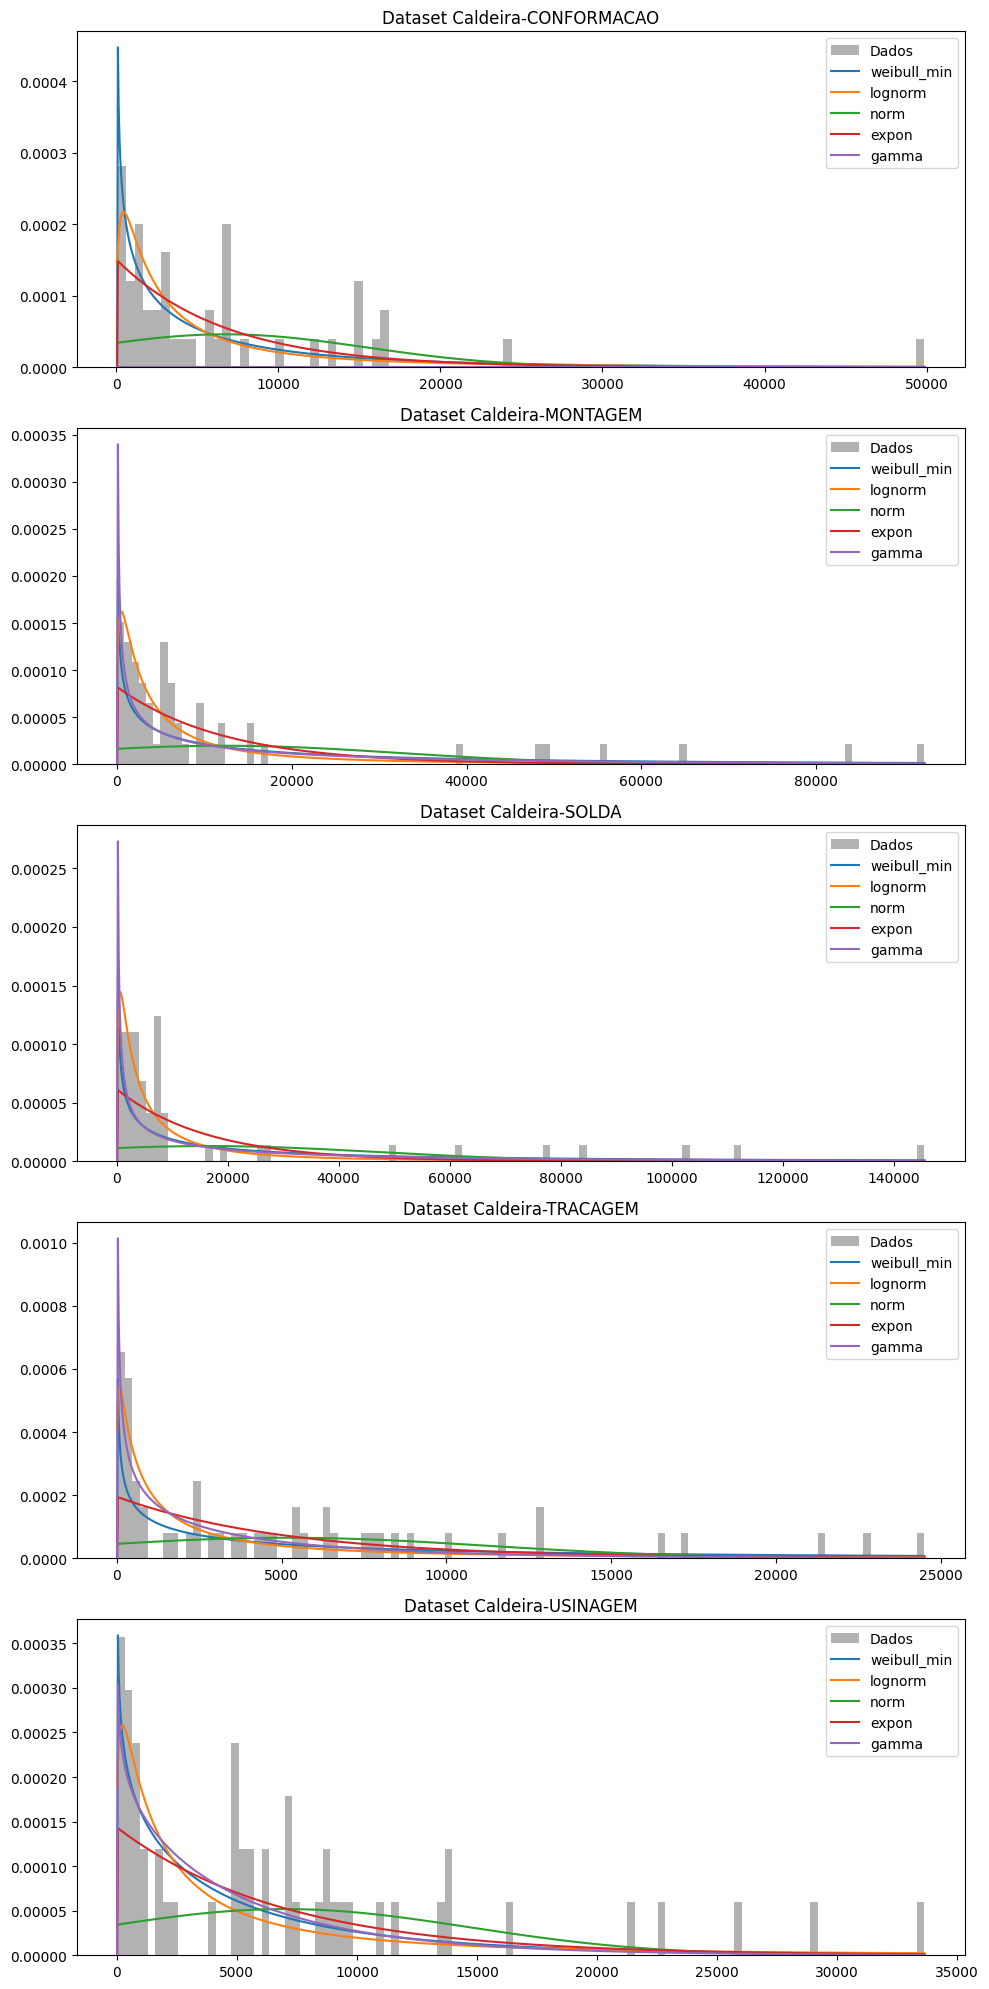

In [6]:
dfs_filtrados = [
    Departamento['CONFORMACAO']['SomaDeHorasApontadasUnitario'].values,
    Departamento['MONTAGEM']['SomaDeHorasApontadasUnitario'].values,
    Departamento['SOLDA']['SomaDeHorasApontadasUnitario'].values,
    Departamento['TRACAGEM']['SomaDeHorasApontadasUnitario'].values,
    Departamento['USINAGEM']['SomaDeHorasApontadasUnitario'].values
    ]

distributions = [weibull_min, lognorm, norm, expon, gamma]

def plot_fits(data, ax, dataset_name):
    """Plota o histograma dos dados e ajusta distribuições sobre ele."""
    # Histograma dos dados
    ax.hist(data, bins=(len(data)*2), density=True, alpha=0.6, color='gray', label='Dados')

    x = np.linspace(min(data) - 0.1, max(data) + 0.1, 1000)

    # Ajustar e plotar distribuições
    for dist in distributions:
        params = dist.fit(data)  # Ajuste da distribuição
        pdf = dist.pdf(x, *params[:-2], loc=params[-2], scale=params[-1])
        ax.plot(x, pdf, label=dist.name)

    ax.set_title(f"Dataset Caldeira-{dataset_name}")
    ax.legend()

# Criar subplots
fig, axes = plt.subplots(5, 1, figsize=(10, 20))

# Plotar cada dataset com os ajustes
for idx, (data, ax, name) in enumerate(zip(dfs_filtrados, axes, departamentos_list)):
    plot_fits(data, ax, name)

plt.tight_layout()
plt.show()

In [7]:
tabela_resultados = []

for resultado in resumoDist:
    dataset = resultado["dataset"]
    outlier_status = resultado["outlier_status"]
    sample = resultado["sample"]

    # Adicionando resultados do MC
    for dist_name, stats in resultado["ad_tests"].items():
        if stats is not None:
            tabela_resultados.append({
                "Dataset": dataset,
                "Outliers": outlier_status,
                "Amostra": sample,
                "Distribuição": dist_name,
                "Método": "MC",
                "Valor-p": stats.get("mc_p", None)
            })

    # Adicionando resultados do KST
    for dist_name, stats in resultado["ad_tests"].items():
        if stats is not None:
            tabela_resultados.append({
                "Dataset": dataset,
                "Outliers": outlier_status,
                "Amostra": sample,
                "Distribuição": dist_name,
                "Método": "KST",
                "Valor-p": stats.get("kst_p", None)
            })

    # Adicionando resultados do CVM
    for dist_name, stats in resultado["ad_tests"].items():
        if stats is not None:
            tabela_resultados.append({
                "Dataset": dataset,
                "Outliers": outlier_status,
                "Amostra": sample,
                "Distribuição": dist_name,
                "Método": "CVM",
                "Valor-p": stats.get("cvm_p", None)
            })
    
    # Adicionando resultados do Chi-quadrado
    for dist_name, stats in resultado["chi2_tests"].items():
        if stats is not None:
            tabela_resultados.append({
                "Dataset": dataset,
                "Outliers": outlier_status,
                "Amostra": sample,
                "Distribuição": dist_name,
                "Método": "Chi-quadrado",
                "Valor-p": stats.get("chi2_p", None)
            })

# Criando o DataFrame com os resultados
df_resultados = pd.DataFrame(tabela_resultados)

# Visualizando a tabela no notebook
display(df_resultados)

# Salvando os resultados em Excel
df_resultados.to_excel("resultados_distribuicoes.xlsx", index=False)

,Dataset,Outliers,Amostra,Distribuição,Método,Valor-p
0,1,Com,0,weibull,MC,0.972028
1,1,Com,0,gamma,MC,0.351648
2,1,Com,0,lognormal,MC,0.709291
3,1,Com,0,exponential,MC,0.214785
4,1,Com,0,normal,MC,0.015984
...,...,...,...,...,...,...
195,5,Sem,0,weibull,Chi-quadrado,1.000000
196,5,Sem,0,gamma,Chi-quadrado,1.000000
197,5,Sem,0,lognormal,Chi-quadrado,1.000000
198,5,Sem,0,exponential,Chi-quadrado,1.000000
